# Natural Language Processing 02 (DSMM Group 2)

# FINAL PROJECT

## 1. Yogesh Kumar (c0852435)

# Creating dataframe  

In [1]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('C:/Users/yogi/documents/fake_job_postings.csv')
print(df.head(10))
print(df.columns)

   job_id                                      title               location  \
0       1                           Marketing Intern       US, NY, New York   
1       2  Customer Service - Cloud Video Production         NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3       4          Account Executive - Washington DC     US, DC, Washington   
4       5                        Bill Review Manager     US, FL, Fort Worth   
5       6                           Accounting Clerk               US, MD,    
6       7                      Head of Content (m/f)         DE, BE, Berlin   
7       8           Lead Guest Service Specialist     US, CA, San Francisco   
8       9                                 HP BSM SME      US, FL, Pensacola   
9      10    Customer Service Associate - Part Time         US, AZ, Phoenix   

   department salary_range                                    company_profile  \
0   Marketing          NaN  We're Food52, and we'

# Data Pre-Processing 

In [2]:
#checking null values
print(df.info())
print(df.isnull().sum().sort_values())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [3]:
# filling null values them
df.fillna('',inplace=True)
df.isnull().sum().sort_values()

job_id                 0
industry               0
required_education     0
required_experience    0
employment_type        0
has_questions          0
has_company_logo       0
telecommuting          0
benefits               0
requirements           0
description            0
company_profile        0
salary_range           0
department             0
location               0
title                  0
function               0
fraudulent             0
dtype: int64

In [4]:
df.describe()
print(df.head(10))

   job_id                                      title               location  \
0       1                           Marketing Intern       US, NY, New York   
1       2  Customer Service - Cloud Video Production         NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3       4          Account Executive - Washington DC     US, DC, Washington   
4       5                        Bill Review Manager     US, FL, Fort Worth   
5       6                           Accounting Clerk               US, MD,    
6       7                      Head of Content (m/f)         DE, BE, Berlin   
7       8           Lead Guest Service Specialist     US, CA, San Francisco   
8       9                                 HP BSM SME      US, FL, Pensacola   
9      10    Customer Service Associate - Part Time         US, AZ, Phoenix   

   department salary_range                                    company_profile  \
0   Marketing               We're Food52, and we'

In [5]:
#taking only required field and merging them in single field
df['text'] = df['description'] + " " + df['requirements']
df['text'].head()
df['text'][0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff Experience with content management systems a major plus (any blogging counts!)Familiar with t

In [6]:
# Dropping unnecessary columns from dataframe
print(df.columns)
df.drop(columns=df.columns[0:len(df.columns)-2],inplace=True)
print(df.head())

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'text'],
      dtype='object')
   fraudulent                                               text
0           0  Food52, a fast-growing, James Beard Award-winn...
1           0  Organised - Focused - Vibrant - Awesome!Do you...
2           0  Our client, located in Houston, is actively se...
3           0  THE COMPANY: ESRI – Environmental Systems Rese...
4           0  JOB TITLE: Itemization Review ManagerLOCATION:...


In [7]:
#function to remove punctuation and digits from document

import string
import re

print(string.punctuation)

def remove_punction(text):
    text_nonpunction=[]
    for x in text:
        text_nonpunction.append([re.sub('\d',"",char) for char in x if char not in string.punctuation])
    return text_nonpunction

df["clean_text"]=remove_punction(df["text"]) 

print(df['clean_text'][0])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['F', 'o', 'o', 'd', '', '', ' ', 'a', ' ', 'f', 'a', 's', 't', 'g', 'r', 'o', 'w', 'i', 'n', 'g', ' ', 'J', 'a', 'm', 'e', 's', ' ', 'B', 'e', 'a', 'r', 'd', ' ', 'A', 'w', 'a', 'r', 'd', 'w', 'i', 'n', 'n', 'i', 'n', 'g', ' ', 'o', 'n', 'l', 'i', 'n', 'e', ' ', 'f', 'o', 'o', 'd', ' ', 'c', 'o', 'm', 'm', 'u', 'n', 'i', 't', 'y', ' ', 'a', 'n', 'd', ' ', 'c', 'r', 'o', 'w', 'd', 's', 'o', 'u', 'r', 'c', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'c', 'u', 'r', 'a', 't', 'e', 'd', ' ', 'r', 'e', 'c', 'i', 'p', 'e', ' ', 'h', 'u', 'b', ' ', 'i', 's', ' ', 'c', 'u', 'r', 'r', 'e', 'n', 't', 'l', 'y', ' ', 'i', 'n', 't', 'e', 'r', 'v', 'i', 'e', 'w', 'i', 'n', 'g', ' ', 'f', 'u', 'l', 'l', ' ', 'a', 'n', 'd', ' ', 'p', 'a', 'r', 't', 't', 'i', 'm', 'e', ' ', 'u', 'n', 'p', 'a', 'i', 'd', ' ', 'i', 'n', 't', 'e', 'r', 'n', 's', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'i', 'n', ' ', 'a', ' ', 's', 'm', 'a', 'l', 'l', ' ', 't', 'e', 'a', 'm', ' ', 'o', 'f', ' '

In [8]:
# a function to combine all elements
def remove_punct_combine(text):
    comb_text=[]
    for x in text:
        comb_text.append("".join([char for char in x if char not in string.punctuation]))
    return comb_text

df['clean_text']=remove_punct_combine(df['clean_text'])
print(df['clean_text'][0])

Food a fastgrowing James Beard Awardwinning online food community and crowdsourced and curated recipe hub is currently interviewing full and parttime unpaid interns to work in a small team of editors executives and developers in its New York City headquartersReproducing andor repackaging existing Food content for a number of partner sites such as Huffington Post Yahoo Buzzfeed and more in their various content management systemsResearching blogs and websites for the Provisions by Food Affiliate ProgramAssisting in daytoday affiliate program support such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR amp Events when neededHelping with office administrative work such as filing mailing and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff Experience with content management systems a major plus any blogging countsFamiliar with the Food editorial voice and aesthe

In [9]:
# fucntion to tokenize Sentence
! pip install nltk
import nltk
from nltk.tokenize import word_tokenize
def token_word(text):
    sents=[]
    for x in text:
        sents.append(word_tokenize(x))
    return sents
df["token_word"]=token_word(df["clean_text"])
print(df["token_word"][0])

['Food', 'a', 'fastgrowing', 'James', 'Beard', 'Awardwinning', 'online', 'food', 'community', 'and', 'crowdsourced', 'and', 'curated', 'recipe', 'hub', 'is', 'currently', 'interviewing', 'full', 'and', 'parttime', 'unpaid', 'interns', 'to', 'work', 'in', 'a', 'small', 'team', 'of', 'editors', 'executives', 'and', 'developers', 'in', 'its', 'New', 'York', 'City', 'headquartersReproducing', 'andor', 'repackaging', 'existing', 'Food', 'content', 'for', 'a', 'number', 'of', 'partner', 'sites', 'such', 'as', 'Huffington', 'Post', 'Yahoo', 'Buzzfeed', 'and', 'more', 'in', 'their', 'various', 'content', 'management', 'systemsResearching', 'blogs', 'and', 'websites', 'for', 'the', 'Provisions', 'by', 'Food', 'Affiliate', 'ProgramAssisting', 'in', 'daytoday', 'affiliate', 'program', 'support', 'such', 'as', 'screening', 'affiliates', 'and', 'assisting', 'in', 'any', 'affiliate', 'inquiriesSupporting', 'with', 'PR', 'amp', 'Events', 'when', 'neededHelping', 'with', 'office', 'administrative', 'w

In [10]:
# function to remove stopword removed 
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
customStopWords = set(stopwords.words('english')+list(punctuation))

def stop_word(text):
    stop_words=[]
    for x in text:
        stop_words.append([word for word in x if word not in customStopWords])
    return stop_words
df['stop_word']=stop_word(df['token_word'])

print(df['stop_word'][0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Food', 'fastgrowing', 'James', 'Beard', 'Awardwinning', 'online', 'food', 'community', 'crowdsourced', 'curated', 'recipe', 'hub', 'currently', 'interviewing', 'full', 'parttime', 'unpaid', 'interns', 'work', 'small', 'team', 'editors', 'executives', 'developers', 'New', 'York', 'City', 'headquartersReproducing', 'andor', 'repackaging', 'existing', 'Food', 'content', 'number', 'partner', 'sites', 'Huffington', 'Post', 'Yahoo', 'Buzzfeed', 'various', 'content', 'management', 'systemsResearching', 'blogs', 'websites', 'Provisions', 'Food', 'Affiliate', 'ProgramAssisting', 'daytoday', 'affiliate', 'program', 'support', 'screening', 'affiliates', 'assisting', 'affiliate', 'inquiriesSupporting', 'PR', 'amp', 'Events', 'neededHelping', 'office', 'administrative', 'work', 'filing', 'mailing', 'preparing', 'meetingsWorking', 'developers', 'document', 'bugs', 'suggest', 'improvements', 'siteSupporting', 'marketing', 'executive', 'staff', 'Experience', 'content', 'management', 'systems', 'majo

In [11]:
# function for stemming document
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    st=[]
    for x in tokenized_text:
        st.append([ps.stem(word) for word in x])
    return st
    
df['stemming']=stemming(df['stop_word'])

print(df['stemming'][0])

['food', 'fastgrow', 'jame', 'beard', 'awardwin', 'onlin', 'food', 'commun', 'crowdsourc', 'curat', 'recip', 'hub', 'current', 'interview', 'full', 'parttim', 'unpaid', 'intern', 'work', 'small', 'team', 'editor', 'execut', 'develop', 'new', 'york', 'citi', 'headquartersreproduc', 'andor', 'repackag', 'exist', 'food', 'content', 'number', 'partner', 'site', 'huffington', 'post', 'yahoo', 'buzzfe', 'variou', 'content', 'manag', 'systemsresearch', 'blog', 'websit', 'provis', 'food', 'affili', 'programassist', 'daytoday', 'affili', 'program', 'support', 'screen', 'affili', 'assist', 'affili', 'inquiriessupport', 'pr', 'amp', 'event', 'neededhelp', 'offic', 'administr', 'work', 'file', 'mail', 'prepar', 'meetingswork', 'develop', 'document', 'bug', 'suggest', 'improv', 'sitesupport', 'market', 'execut', 'staff', 'experi', 'content', 'manag', 'system', 'major', 'plu', 'blog', 'countsfamiliar', 'food', 'editori', 'voic', 'aestheticlov', 'food', 'appreci', 'import', 'home', 'cook', 'cook', 's

In [12]:
#function for lemmatization a document
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    lem=[]
    for x in tokenized_text:
        lem.append([wn.lemmatize(word) for word in x])
    return lem

df['lemmatize']=lemmatizing(df['stemming'])



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yogi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
#function to create final document/text for vectorization
def final_doc(text):
    str=""
    str+=" ".join(text)
    return str

df["full_doc"]=df['lemmatize'].apply(final_doc)

#dropping previously created columns and retaining only final clean document/text for model
df.drop(columns=df.columns[1:-1],inplace=True)
print(df)

       fraudulent                                           full_doc
0               0  food fastgrow jame beard awardwin onlin food c...
1               0  organis focus vibrant awesomedo passion custom...
2               0  our client locat houston activ seek experienc ...
3               0  the compani esri – environment system research...
4               0  job titl item review managerloc fort worth tx ...
...           ...                                                ...
17875           0  just case first time ’ visit websit vend award...
17876           0  the payrol account focu primarili payrol funct...
17877           0  experienc project cost control staff engin req...
17878           0  nemsia studio look experienc visualgraph desig...
17879           0  who wevend award win web base point sale softw...

[17880 rows x 2 columns]


In [14]:
#creating target and features and splitting them into train and test datasets
from sklearn.model_selection import train_test_split

X = df['full_doc']
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [15]:
#Vectorization using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(binary=False,ngram_range=(2,3))
cv_train= cv.fit_transform(X_train)
cv_test=cv.transform(X_test)
print(cv_train.shape)
print(cv_test.shape)

(14304, 1960816)
(3576, 1960816)


# Machine learning models implementation

Accuracy Score : 0.959731543624161
Precision Score : 1.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3374
           1       1.00      0.29      0.45       202

    accuracy                           0.96      3576
   macro avg       0.98      0.64      0.71      3576
weighted avg       0.96      0.96      0.95      3576



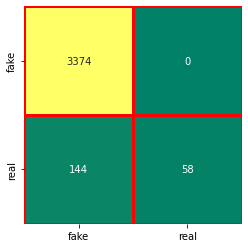

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(criterion='entropy',max_depth=5)

dt_model.fit(cv_train,y_train)

dt_pred=dt_model.predict(cv_test)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

acc1=accuracy_score(y_test,dt_pred)
pre1=precision_score(y_test,dt_pred)

print("Accuracy Score :",acc1)
print("Precision Score :",pre1)

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True, cmap='summer', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=['fake','real'],yticklabels=['fake','real'],fmt='.4g')

print(classification_report(y_test,dt_pred))




Accuracy Score : 0.959731543624161
Precision Score : 1.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3374
           1       1.00      0.29      0.45       202

    accuracy                           0.96      3576
   macro avg       0.98      0.64      0.71      3576
weighted avg       0.96      0.96      0.95      3576



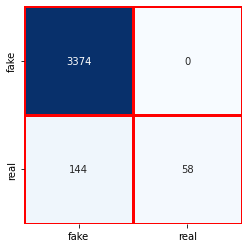

In [17]:
from sklearn.svm import SVC

svc_model= SVC(kernel='sigmoid', gamma=1.0)
svc_model.fit(cv_train,y_train)

svc_pred=dt_model.predict(cv_test)
acc2=accuracy_score(y_test,svc_pred)
pre2=precision_score(y_test,svc_pred)
print("Accuracy Score :",accuracy_score(y_test,svc_pred))
print("Precision Score :",precision_score(y_test,svc_pred))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True, cmap='Blues', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=['fake','real'],yticklabels=['fake','real'],fmt='.4g')
print(classification_report(y_test,svc_pred))


Accuracy Score : 0.9711968680089486
Precision Score : 0.8278145695364238
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3374
           1       0.83      0.62      0.71       202

    accuracy                           0.97      3576
   macro avg       0.90      0.81      0.85      3576
weighted avg       0.97      0.97      0.97      3576



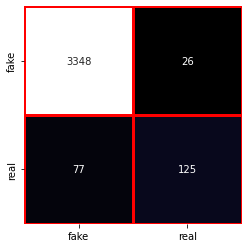

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()

mnb_model.fit(cv_train,y_train)

mnb_pred=mnb_model.predict(cv_test)
acc3=accuracy_score(y_test,mnb_pred)
pre3=precision_score(y_test,mnb_pred)
print("Accuracy Score :",accuracy_score(y_test,mnb_pred))
print("Precision Score :",precision_score(y_test,mnb_pred))

sns.heatmap(confusion_matrix(y_test,mnb_pred),annot=True, cmap='CMRmap', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=['fake','real'],yticklabels=['fake','real'],fmt='.4g')

print(classification_report(y_test,mnb_pred))


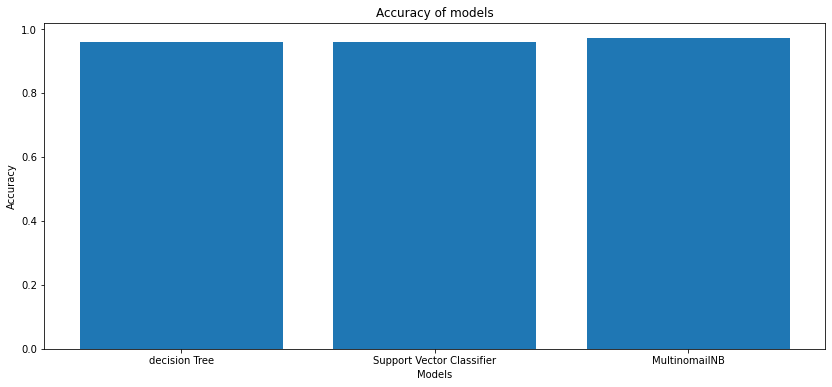

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
models = ["decision Tree","Support Vector Classifier","MultinomailNB"]
acc= [acc1,acc2,acc3]
pre= [pre1,pre2,pre3]
plt.bar(models,acc)
plt.title('Accuracy of models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

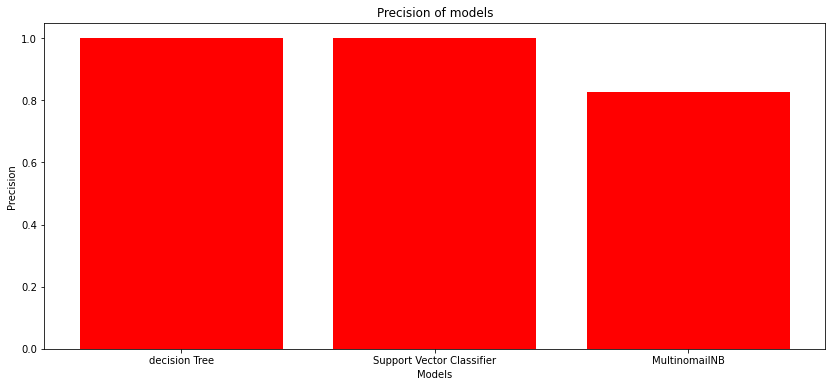

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.bar(models,pre,color='red')
plt.title('Precision of models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

# Conclusion
After Training and predciting with Multiple algorithms on test data set, We can conclude that multinomial model have highest accuracy but less precision and decision tree model and SVM(Support Vector Classifier) model also have high accuracy with good precision score but SVM(Support Vector Classifier) have more processing time than decision tree model. we can choose decision   tree classifier as best algorithms to to sovle NLP problem, there are a couple of dvantages of using an descision tree classifier. Firstly, They are very fast and efficient compared to other classification algorithms. As decision trees are simple hence they require less effort for understanding an algorithm. The decision tree is one of the machine learning algorithms where we don’t worry about its feature scaling. 